In [1]:
from metrics.evaluation_metrics import *
from utils.util_torch import PointCloudDataSet, PointCloudDataCollator

In [2]:
from new.configs import *
from new.utils import * 
from new.models import *

In [3]:
opt = parse_config()
print(opt)

Namespace(activate_eval=0, activation='ReLU', argment_mode=0, argment_noise=0.01, batch_norm='ln', batch_size=128, beta1_des=0.9, category='chair', checkpoint_path='', cuda='-1', data_path='data', data_size=10000, debug=99, do_evaluation=1, drop_last=False, eval_step=50, fp16='None', gradient_accumulation_steps=1, langevin_clip=1, langevin_decay=0, learning_mode=0, lr=0.0005, lr_decay=0.998, mode='train', net_type='default_medium', noise_decay=0, normalize='ebp', num_chain=1, num_point=2048, num_steps=2000, output_dir='default', point_dim=3, random_sample=1, ref_sigma=0.3, sample_step=64, seed=666, stable_check=1, step_size=0.01, test_size=16, visualize_mode=0, warm_start=0)


In [4]:
opt.batch_size = batch_size
opt.swap_axis = True
if len(opt.checkpoint_path) == 0:
    opt.checkpoint_path = None 
opt.device = "cuda:%s" % opt.cuda if opt.cuda!="" else "cpu"
opt.shuffle = not opt.warm_start

In [5]:
train_data = PointCloudDataSet(opt)
data_collator = PointCloudDataCollator(opt)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=opt.batch_size, drop_last=opt.drop_last, 
shuffle=opt.shuffle, collate_fn = data_collator, num_workers=torch.cuda.device_count() * 4)

In [6]:
train_data[0].unsqueeze(0).shape

torch.Size([1, 2048, 3])

In [7]:
#from utils.util_torch import visualize

In [8]:
#visualize(train_data[0].unsqueeze(0))

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [10]:
point_clouds = next(iter(train_loader))

In [11]:
num_cols,num_rows = 4, 4
idx = None

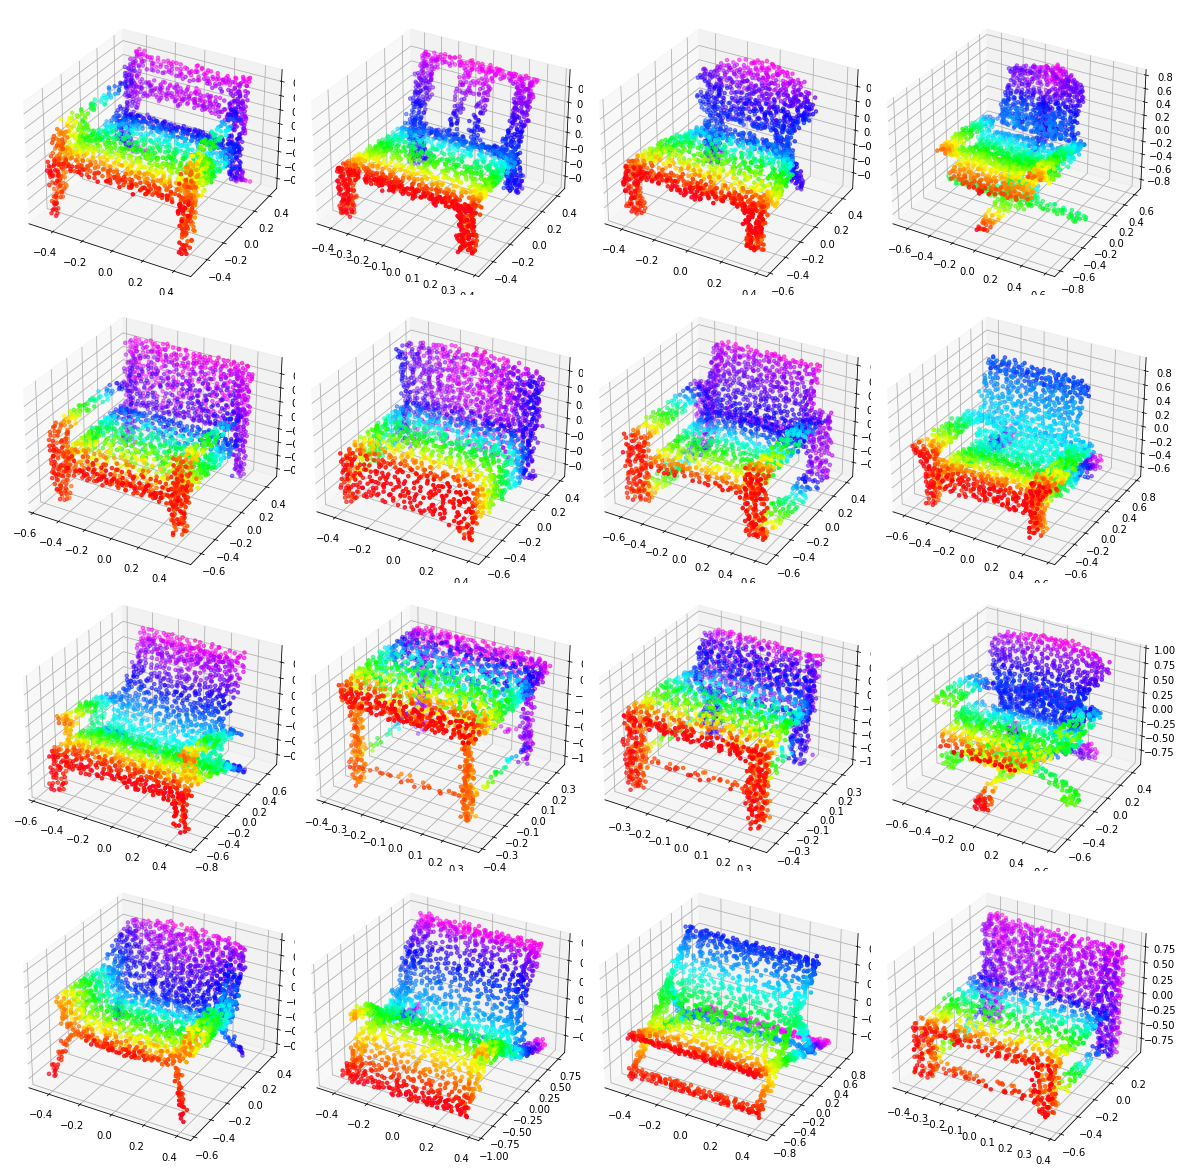

In [12]:
if point_clouds.shape[1] < 10: 
    point_clouds = np.swapaxes(point_clouds, 1, 2)
num_clouds = len(point_clouds)
# num_rows = min(num_rows, num_clouds // num_cols + 1)

fig = plt.figure(figsize=(num_cols * 4, num_rows * 4))
for i, pts in enumerate(point_clouds[:num_cols*num_rows]):
    #print(i)
    if point_clouds.shape[2] == 3: 
        ax = plt.subplot(num_rows, num_cols, i+1, projection='3d')
        plt.subplots_adjust(0,0,1,1,0,0)
        #ax.axis('off')
        if idx is not None:
            ax.set_title(str(idx[i]))
        ax.scatter(pts[:,0], pts[:,2], pts[:,1], marker='.', s=50, c=pts[:,2], cmap=plt.get_cmap('gist_rainbow'))
    else: 
        ax = plt.subplot(num_rows, num_cols, i+1)
        plt.subplots_adjust(0,0,1,1,0,0)
        # ax.axis('off')
        if idx is not None:
            ax.set_title(str(idx[i]))
        ax.scatter(pts[:,1], -pts[:,0], marker='.', s=30)

In [13]:
plt.show()